# Data Generation

Generate synthetic data that simulates a real-world debt forgiveness problem

# Dependencies

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from config import TREATMENT, OUTCOME
from modules.data_generation import (
    DataGeneration,
    add_synthetic_features
)
from utils.basics import plot_hist

# Env vars

In [2]:
n_samples = 15000
percentiles = np.arange(0, 1, 0.1)

# Utils

In [18]:
def get_high_correlations(df, features, threshold=0.7):
    # Calculate correlation matrix
    corr_matrix = df[features].corr()
    
    # Get upper triangle of correlation matrix (avoiding duplicates)
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find feature pairs with absolute correlation above threshold
    high_corr_pairs = []
    for col in upper_tri.columns:
        # Get correlations above threshold for this column
        high_corr = upper_tri[col][abs(upper_tri[col]) > threshold]
        
        # Add pairs to results
        for idx, corr_value in high_corr.items():
            high_corr_pairs.append({
                'feature1': col,
                'feature2': idx,
                'correlation': round(corr_value, 3)
            })
    
    return high_corr_pairs

# Generate data

## Random financial variables

In [3]:
generator = DataGeneration()
df = generator.generate_random_financial_data(n_samples)
df.describe(percentiles=percentiles)

,years_history,n_accounts,n_loans,years_since_default,loss_given_default,default_debt_amount,n_cards,n_refin,months_since_first_payment,debt_cirbe
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,19.982317,0.319400,1.508333,3.968228,0.688834,38885.485147,2.275933,1.015467,39.682979,11259.504426
std,9.940777,0.625201,1.238884,2.783502,0.111623,49197.252288,1.674629,1.017626,39.635786,11104.531249
min,1.374107,0.000000,0.000000,0.001136,0.213842,407.604695,0.000000,0.000000,0.002167,382.817905
0%,1.374107,0.000000,0.000000,0.001136,0.213842,407.604695,0.000000,0.000000,0.002167,382.817905
10%,8.773730,0.000000,0.000000,1.067299,0.540070,6433.488644,0.000000,0.000000,4.210603,2890.946901
20%,11.476508,0.000000,0.000000,1.630237,0.596488,10064.830129,1.000000,0.000000,8.758897,4121.635263
30%,13.752999,0.000000,1.000000,2.180838,0.635298,14009.787927,1.000000,0.000000,14.008129,5329.493866
40%,16.036238,0.000000,1.000000,2.742139,0.666853,18458.728115,2.000000,1.000000,19.992859,6644.629923
50%,18.351923,0.000000,1.000000,3.341974,0.697407,23801.967369,2.000000,1.000000,27.230646,8153.257006


In [4]:
df.corr()

,years_history,n_accounts,n_loans,years_since_default,loss_given_default,default_debt_amount,n_cards,n_refin,months_since_first_payment,debt_cirbe
years_history,1.000000,0.114800,0.020165,0.009958,0.011591,0.001058,0.006556,0.005760,-0.010224,-0.002755
n_accounts,0.114800,1.000000,0.000394,-0.000018,-0.002671,0.005162,0.004712,-0.002002,-0.005895,0.000565
n_loans,0.020165,0.000394,1.000000,0.002495,-0.000718,0.057097,0.002443,-0.001689,0.000302,0.001590
years_since_default,0.009958,-0.000018,0.002495,1.000000,0.003802,0.011194,-0.001736,0.012496,0.005033,0.008817
loss_given_default,0.011591,-0.002671,-0.000718,0.003802,1.000000,0.008332,-0.001265,-0.012474,0.003745,-0.000488
default_debt_amount,0.001058,0.005162,0.057097,0.011194,0.008332,1.000000,-0.006165,0.002327,-0.003384,-0.006259
n_cards,0.006556,0.004712,0.002443,-0.001736,-0.001265,-0.006165,1.000000,-0.002935,0.005479,-0.013544
n_refin,0.005760,-0.002002,-0.001689,0.012496,-0.012474,0.002327,-0.002935,1.000000,0.002705,-0.006900
months_since_first_payment,-0.010224,-0.005895,0.000302,0.005033,0.003745,-0.003384,0.005479,0.002705,1.000000,0.010446
debt_cirbe,-0.002755,0.000565,0.001590,0.008817,-0.000488,-0.006259,-0.013544,-0.006900,0.010446,1.000000


## Treatment

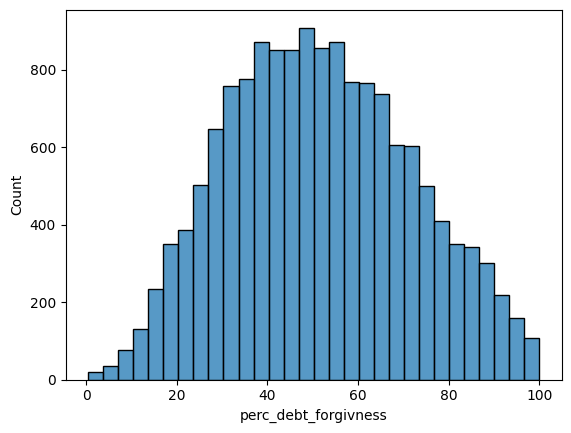

<Figure size 1000x800 with 0 Axes>

In [5]:
generator.fit_scalers(df)
df[TREATMENT] = generator.generate_treatment(df, noise=True, noise_scale=0.0, treament_noise_std=7)
plot_hist(df, TREATMENT)

## Outcome

In [6]:
df[OUTCOME + "_probs"] = generator.calculate_outcome_probability(df, df[TREATMENT])
df[OUTCOME]  = np.random.binomial(n=1, p=df[OUTCOME + "_probs"])

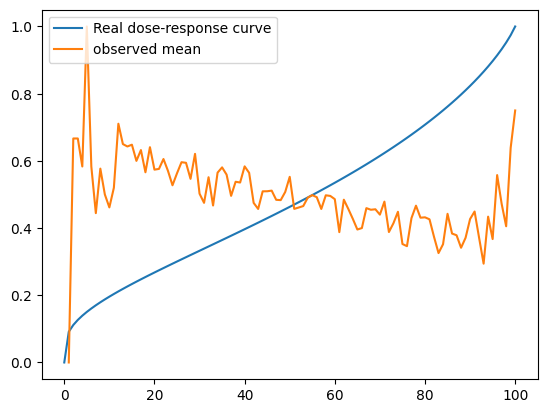

In [7]:
# Causal curves
step = 1
bin_edges = np.arange(0, 100+step, step)
real_dose_response = generator.compute_causal_effects(df, bin_edges, "ate")
bin_edges_contained = bin_edges.copy()
bin_edges_contained[0] = -1
df['treatment_bin'] = pd.cut(df[TREATMENT], bins=bin_edges_contained, labels=False)

mean_outcome = [c[0] for c in df.groupby(['treatment_bin'])[[OUTCOME]].mean().to_numpy().tolist()]
plt.plot(bin_edges, real_dose_response, label="Real dose-response curve")
plt.plot(bin_edges[1:], mean_outcome, label="observed mean")
plt.legend(loc="upper left")
plt.show()


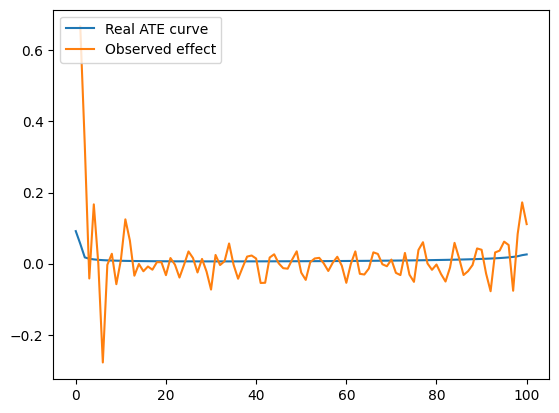

In [8]:
real_ate_curve = np.gradient(real_dose_response, bin_edges)
mean_observed_effect = np.gradient(mean_outcome, bin_edges[1:])
plt.plot(bin_edges, real_ate_curve, label="Real ATE curve")
plt.plot(bin_edges[1:], mean_observed_effect, label="Observed effect")
plt.legend(loc="upper left")
plt.show()

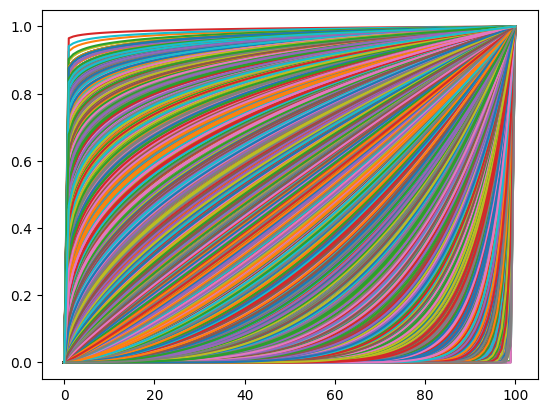

In [9]:
# Individual Causal curves
individial_dose_responses = generator.compute_causal_effects(df, bin_edges, "ite")
for i, line in enumerate(individial_dose_responses):
    ax = plt.plot(bin_edges, line, label=f'Line {i+1}')

plt.show()

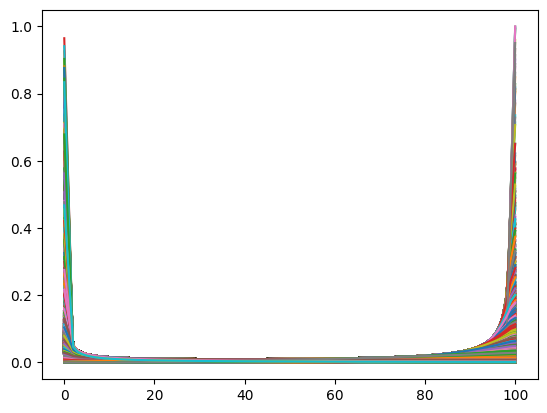

In [10]:
for i, line in enumerate(individial_dose_responses):
    real_ite_curve = np.gradient(line, bin_edges)
    ax = plt.plot(bin_edges, real_ite_curve, label=f'Line {i+1}')


plt.show()

## Redundant and Noisy features

In [11]:
df.drop(columns=['treatment_bin', 'debt_repayment_flag_probs'], inplace=True)
df = add_synthetic_features(df, n_redundant=100, n_noise=300)
df.describe()

c:\Users\xavim\Documents\causal_inference\causal_paper\modules\data_generation.py:295: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f'redundantfeature{i+1}_{base_feature}'] = redundant_feature
c:\Users\xavim\Documents\causal_inference\causal_paper\modules\data_generation.py:295: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df[f'redundantfeature{i+1}_{base_feature}'] = redundant_feature
c:\Users\xavim\Documents\causal_inference\causal_paper\modules\data_generation.py:295: PerformanceWarning: DataFrame is highly

,years_history,n_accounts,n_loans,years_since_default,loss_given_default,default_debt_amount,n_cards,n_refin,months_since_first_payment,debt_cirbe,...,noise*feature*291,noise*feature*292,noise*feature*293,noise*feature*294,noise*feature*295,noise*feature*296,noise*feature*297,noise*feature*298,noise*feature*299,noise*feature*300
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04
mean,19.982317,0.319400,1.508333,3.968228,0.688834,38885.485147,2.275933,1.015467,39.682979,11259.504426,...,6.555941e-16,3.221127e-17,1.207923e-15,-5.258016e-16,8.753887e-16,1.980046e-16,4.642213e-17,1.428665e-15,1.449507e-16,7.465436e-16
std,9.940777,0.625201,1.238884,2.783502,0.111623,49197.252288,1.674629,1.017626,39.635786,11104.531249,...,3.000100e+00,2.000067e+00,4.000133e+00,4.000133e+00,4.000133e+00,2.000067e+00,2.000067e+00,4.000133e+00,3.000100e+00,2.000067e+00
min,1.374107,0.000000,0.000000,0.001136,0.213842,407.604695,0.000000,0.000000,0.002167,382.817905,...,-9.362237e+01,-6.815706e+00,-2.617038e+01,-6.865995e+00,-5.694275e+01,-2.745820e+00,-8.989074e-01,-2.357963e+00,-2.321015e+00,-6.387958e+00
25%,12.646674,0.000000,1.000000,1.917184,0.616871,11986.605294,1.000000,0.000000,11.252481,4713.932858,...,-5.299980e-01,-1.363474e+00,-2.245849e+00,-2.931921e+00,-1.327008e+00,-1.465852e+00,-7.351369e-01,-1.875167e+00,-1.765174e+00,-1.371422e+00
50%,18.351923,0.000000,1.000000,3.341974,0.697407,23801.967369,2.000000,1.000000,27.230646,8153.257006,...,8.836169e-01,1.415538e-01,5.759173e-01,-7.403442e-01,1.037901e+00,-4.736017e-01,-4.764526e-01,-1.130961e+00,-9.390398e-01,2.582182e-01
75%,25.701717,0.000000,2.000000,5.341356,0.769178,46677.561863,3.000000,2.000000,55.382232,13855.912559,...,1.600850e+00,1.506418e+00,2.899439e+00,2.157592e+00,2.608851e+00,9.571594e-01,1.018253e-01,4.343543e-01,6.234765e-01,1.631575e+00
max,84.700469,6.000000,9.000000,22.908614,0.967378,949518.800214,11.000000,7.000000,339.050532,211430.007418,...,2.086780e+00,4.462778e+00,8.025231e+00,2.620160e+01,4.977107e+00,1.429246e+01,1.003330e+02,1.135985e+02,6.252870e+01,3.228265e+00


In [17]:
redundant_features = [c for c in df.columns if "redundant" in c]
original_features = list(df.iloc[:, :10].columns)
correlated_pairs = get_high_correlations(df, original_features+redundant_features, threshold=0.7)
print(correlated_pairs)
print(len(correlated_pairs))

[{'feature1': 'redundantfeature1_n_cards', 'feature2': 'n_cards', 'correlation': 0.846}, {'feature1': 'redundantfeature6_n_accounts', 'feature2': 'n_accounts', 'correlation': -0.721}, {'feature1': 'redundantfeature14_default_debt_amount', 'feature2': 'default_debt_amount', 'correlation': 0.832}, {'feature1': 'redundantfeature20_n_refin', 'feature2': 'n_refin', 'correlation': -0.834}, {'feature1': 'redundantfeature26_years_since_default', 'feature2': 'years_since_default', 'correlation': 0.782}, {'feature1': 'redundantfeature30_years_since_default', 'feature2': 'years_since_default', 'correlation': -0.707}, {'feature1': 'redundantfeature33_n_accounts', 'feature2': 'n_accounts', 'correlation': 0.743}, {'feature1': 'redundantfeature42_n_accounts', 'feature2': 'n_accounts', 'correlation': -0.83}, {'feature1': 'redundantfeature52_months_since_first_payment', 'feature2': 'months_since_first_payment', 'correlation': -0.832}, {'feature1': 'redundantfeature53_loss_given_default', 'feature2': 'l

In [13]:
null_counts = df.isnull().sum()
    
    # Filter to only columns that have nulls and sort by number of nulls
features_with_nulls = null_counts[null_counts > 0].sort_values(ascending=False)
features_with_nulls

Series([], dtype: int64)

# Save data

In [14]:
df.to_parquet("data/synthetic_data.parquet")

In [15]:
with open('data/data_generator.pkl', 'wb') as file:
    pickle.dump(generator, file)
